In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import tensorflow as tf
from tensorflow.keras import layers
import keras_tuner as kt
from tensorflow import keras
import matplotlib.pyplot as plt

# Importing specific modules from libraries
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Importing User-defined functions from utilis
from main_utilis import read_data, data_from_to_numpy, std_normalise_data
from utils import augment_data, standard_model, load_and_evaluate
from equi_nn_utilis import (
    EquivariantHiddenLayer,
    EquivariantOutputLayer,
    eq_build_model,
)

# Setting numpy print options to display floating point numbers up to 3 decimal points
np.set_printoptions(precision=3, suppress=True)

<IPython.core.display.Javascript object>

In [3]:
custom_objects = {
    "EquivariantOutputLayer": EquivariantOutputLayer,
    "EquivariantHiddenLayer": EquivariantHiddenLayer,
}

<IPython.core.display.Javascript object>

In [4]:
df_100, df_1000, df_val = read_data()
X_train_100, y_train_100, X_train_1000, y_train_1000, X_val, y_val = data_from_to_numpy(
    df_100, df_1000, df_val
)
X_train_100_norm, X_train_1000_norm, X_val_norm = std_normalise_data(
    X_train_100, X_train_1000, X_val
)

# Augment the training data with the augment_data function for the training
x_train_augmented, y_train_augmented = augment_data(X_train_100_norm, y_train_100)
x_train_augmented_1000, y_train_augmented_1000 = augment_data(
    X_train_1000_norm, y_train_1000
)
# Convert the augmented data and labels to numpy arrays
X_train_augmented = np.array(x_train_augmented)
y_train_augmented = np.array(y_train_augmented)
X_train_augmented_1000 = np.array(x_train_augmented_1000)
y_train_augmented_1000 = np.array(y_train_augmented_1000)

<IPython.core.display.Javascript object>

In [5]:
"""
Call the function load_and_evaluate from utilis  and pass three values (which_model= between 1 and 8, feature=X_test, target=y_test)
1. model_standard_100.h5
2. model_standard_1000.h5
3. model_standard_100_augmented.h5
4. model_standard_1000_augmented.h5
5. model_equivariant_100.h5
6. model_equivariant_1000.h5
7. model_equivariant_100_augmented.h5
8. model_equivariant_1000_augmented.h5
To evaluate call the model and choose the option and pass the dataset that is required to be evaluated
features = X_val or X_test
target = y_val or y_test
"""
# load_and_evaluate(1, X_val_norm, y_val)

'\nCall the function load_and_evaluate from utilis  and pass three values (which_model= between 1 and 8, feature=X_test, target=y_test)\n1. model_standard_100.h5\n2. model_standard_1000.h5\n3. model_standard_100_augmented.h5\n4. model_standard_1000_augmented.h5\n5. model_equivariant_100.h5\n6. model_equivariant_1000.h5\n7. model_equivariant_100_augmented.h5\n8. model_equivariant_1000_augmented.h5\nTo evaluate call the model and choose the option and pass the dataset that is required to be evaluated\nfeatures = X_val or X_test\ntarget = y_val or y_test\n'

<IPython.core.display.Javascript object>

In [68]:
def load_and_evaluate(which_model, features, target):
    """
    This function takes the name of the model and evalutes the models with validation data/ replace validation data with Test Data to evalute test data
    Choose option to evaluate a particular model
    1. model_standard_100.h5
    2. model_standard_1000.h5
    3. model_standard_100_augmented.h5
    4. model_standard_1000_augmented.h5
    5. model_equivariant_100.h5
    6. model_equivariant_1000.h5
    7. model_equivariant_100_augmented.h5
    8. model_equivariant_1000_augmented.h5
    To evaluate call the model and choose the option and pass the dataset that is required to be evaluated
    features = X_val or X_test
    target = y_val or y_test
    """

    if which_model == 1:
        load_model = tf.keras.models.load_model("models/model_standard_100.h5")
        print(
            f"The model is trained for 100 Samples without augmentation using standard model definition"
        )
    elif which_model == 2:
        load_model = tf.keras.models.load_model("models/model_standard_1000.h5")
        print(
            f"The model is trained for 1000 Samples without augmentation using standard model definition"
        )
    elif which_model == 3:
        load_model = tf.keras.models.load_model(
            "models/model_standard_100_augmented.h5"
        )
        print(
            f"The model is trained for 100 Samples with augmentation using standard model definition"
        )
    elif which_model == 4:
        load_model = tf.keras.models.load_model(
            "models/models_h/model_standard_100_augmented.h5",
            custom_objects=custom_objects,
        )
        print(
            f"The model is trained for 100 Samples with H augmentation using Equivariant model definition"
        )
    elif which_model == 5:
        load_model = tf.keras.models.load_model(
            "models/model_standard_1000_augmented.h5"
        )
        print(
            f"The model is trained for 1000 Samples with augmentation using standard model definition"
        )
    elif which_model == 6:
        load_model = tf.keras.models.load_model(
            "models/models_h/model_standard_1000_augmented.h5",
            custom_objects=custom_objects,
        )
        print(
            f"The model is trained for 1000 Samples with H augmentation using Equivariant model definition"
        )
    elif which_model == 7:
        load_model = tf.keras.models.load_model(
            "models/model_equivariant_100.h5", custom_objects=custom_objects
        )
        print(
            f"The model is trained for 100 Samples without augmentation using Equivariant model definition"
        )
    elif which_model == 8:
        load_model = tf.keras.models.load_model(
            "models/model_equivariant_1000.h5", custom_objects=custom_objects
        )
        print(
            f"The model is trained for 1000 Samples without augmentation using Equivariant model definition"
        )
    elif which_model == 9:
        load_model = tf.keras.models.load_model(
            "models/model_equivariant_100_augmented.h5", custom_objects=custom_objects
        )
        print(
            f"The model is trained for 100 Samples with augmentation using Equivariant model definition"
        )
    elif which_model == 10:
        load_model = tf.keras.models.load_model(
            "models/models_h/model_equivariant_100_augmented.h5",
            custom_objects=custom_objects,
        )
        print(
            f"The model is trained for 100 Samples with H augmentation using Equivariant model definition"
        )
    elif which_model == 11:
        load_model = tf.keras.models.load_model(
            "models/model_equivariant_1000_augmented.h5", custom_objects=custom_objects
        )
        print(
            f"The model is trained for 1000 Samples with augmentation using Equivariant model definition"
        )
    else:
        load_model = tf.keras.models.load_model(
            "models/models_h/model_equivariant_1000_augmented.h5",
            custom_objects=custom_objects,
        )
        print(
            f"The model is trained for 1000 Samples with H augmentation using Equivariant model definition"
        )

    evaluated_results = load_model.evaluate(features, target)

    return evaluated_results

<IPython.core.display.Javascript object>

In [69]:
for i in range(1, 13):
    print(f"The Evaluated Results are: {i} \n")
    load_and_evaluate(i, X_val_norm, y_val)
    print("\n\n")

The Evaluated Results are: 1 

The model is trained for 100 Samples without augmentation using standard model definition
32/32 [==============================] - 0s 1ms/step - loss: 0.0207 - mae: 0.1219



The Evaluated Results are: 2 

The model is trained for 1000 Samples without augmentation using standard model definition
32/32 [==============================] - 0s 3ms/step - loss: 0.0153 - mae: 0.1008



The Evaluated Results are: 3 

The model is trained for 100 Samples with augmentation using standard model definition
32/32 [==============================] - 0s 1ms/step - loss: 0.3318 - mae: 0.5008



The Evaluated Results are: 4 

The model is trained for 100 Samples with H augmentation using Equivariant model definition
32/32 [==============================] - 0s 2ms/step - loss: 0.0065 - mae: 0.0631



The Evaluated Results are: 5 

The model is trained for 1000 Samples with augmentation using standard model definition
32/32 [==============================] - 0s 985us/step - 

<IPython.core.display.Javascript object>

In [116]:
def display_true_and_predicted_values():
    model1 = tf.keras.models.load_model("models/model_standard_100.h5")
    model2 = tf.keras.models.load_model("models/model_standard_1000.h5")
    model3 = tf.keras.models.load_model("models/model_standard_100_augmented.h5")
    model4 = tf.keras.models.load_model("models/model_standard_1000_augmented.h5")
    model5 = tf.keras.models.load_model(
        "models/models_h/model_standard_100_augmented.h5"
    )
    model6 = tf.keras.models.load_model(
        "models/models_h/model_standard_1000_augmented.h5"
    )
    model7 = tf.keras.models.load_model(
        "models/model_equivariant_100.h5", custom_objects=custom_objects
    )
    model8 = tf.keras.models.load_model(
        "models/model_equivariant_1000.h5", custom_objects=custom_objects
    )
    model9 = tf.keras.models.load_model(
        "models/model_equivariant_100_augmented.h5", custom_objects=custom_objects
    )
    model10 = tf.keras.models.load_model(
        "models/model_equivariant_1000_augmented.h5", custom_objects=custom_objects
    )
    model11 = tf.keras.models.load_model(
        "models/models_h/model_equivariant_100_augmented.h5",
        custom_objects=custom_objects,
    )
    model12 = tf.keras.models.load_model(
        "models/models_h/model_equivariant_1000_augmented.h5",
        custom_objects=custom_objects,
    )
    y_predict1 = model1.predict(X_val_norm)
    y_predict2 = model2.predict(X_val_norm)
    y_predict3 = model3.predict(X_val_norm)
    y_predict4 = model4.predict(X_val_norm)
    y_predict5 = model5.predict(X_val_norm)
    y_predict6 = model6.predict(X_val_norm)
    y_predict7 = model7.predict(X_val_norm)
    y_predict8 = model8.predict(X_val_norm)
    y_predict9 = model9.predict(X_val_norm)
    y_predict10 = model10.predict(X_val_norm)
    y_predict11 = model11.predict(X_val_norm)
    y_predict12 = model12.predict(X_val_norm)

    def display_item(
        x,
        y,
        y_pred1,
        y_pred2,
        y_pred3,
        y_pred4,
        y_pred5,
        y_pred6,
        y_pred7,
        y_pred8,
        y_pred9,
        y_pred10,
        y_pred11,
        y_pred12,
        figsize=(16, 8),
        filename=None,
    ):
        # Create a figure with the specified size
        fig, ax = plt.subplots(figsize=figsize)
        # Plot x points, x - intensity of borders
        plt.scatter([1.0, -1.0, -1.0, 1.0], [1.0, 1.0, -1.0, -1.0], s=x * 300)
        # Plot y as coordinates
        plt.scatter(y[1], y[0], s=200, color="black", label="y")
        # Plot y_pred as coordinates
        plt.scatter(
            y_pred1[1], y_pred1[0], s=200, color="brown", label="model_standard_100"
        )
        plt.scatter(
            y_pred2[1],
            y_pred2[0],
            s=200,
            color="tan",
            label="model_standard_1000",
        )
        plt.scatter(
            y_pred3[1],
            y_pred3[0],
            s=200,
            color="gold",
            label="model_standard_100_augmented",
        )
        plt.scatter(
            y_pred4[1],
            y_pred4[0],
            s=200,
            color="chocolate",
            label="model_standard_1000_augmented",
        )
        plt.scatter(
            y_pred5[1],
            y_pred5[0],
            s=200,
            color="pink",
            label="model_standard_100_augmented_H",
        )
        plt.scatter(
            y_pred6[1],
            y_pred6[0],
            s=200,
            color="orange",
            label="model_standard_1000_augmented_H",
        )
        plt.scatter(
            y_pred7[1], y_pred7[0], s=200, color="teal", label="model_equivariant_100"
        )
        plt.scatter(
            y_pred8[1],
            y_pred8[0],
            s=200,
            color="yellow",
            label="model_equivariant_1000",
        )
        plt.scatter(
            y_pred9[1],
            y_pred9[0],
            s=200,
            color="violet",
            label="model_equivariant_100_augmented",
        )
        plt.scatter(
            y_pred10[1],
            y_pred10[0],
            s=200,
            color="purple",
            label="model_equivariant_1000_augmented",
        )
        plt.scatter(
            y_pred11[1],
            y_pred11[0],
            s=200,
            color="crimson",
            label="model_equivariant_100_augmented_H",
        )
        plt.scatter(
            y_pred12[1],
            y_pred12[0],
            s=200,
            color="navy",
            label="model_equivariant_1000_augmented_H",
        )
        plt.axis("square")
        plt.grid(True)
        plt.legend()
        # Save the figure if a filename is specified
        if filename:
            plt.savefig(filename, dpi=400)
        plt.show()

    return display_item(
        X_val_norm[0, :],
        y_val[0, :],
        y_predict1[0, :],
        y_predict2[0, :],
        y_predict3[0, :],
        y_predict4[0, :],
        y_predict5[0, :],
        y_predict6[0, :],
        y_predict7[0, :],
        y_predict8[0, :],
        y_predict9[0, :],
        y_predict10[0, :],
        y_predict11[0, :],
        y_predict12[0, :],
        filename="model_comparison.png",
    )

<IPython.core.display.Javascript object>

In [117]:
# def display_true_and_predicted_values():
#     model1 = tf.keras.models.load_model("models/model_standard_100.h5")
#     model2 = tf.keras.models.load_model("models/model_standard_1000.h5")
#     model3 = tf.keras.models.load_model("models/model_standard_100_augmented.h5")
#     model4 = tf.keras.models.load_model("models/model_standard_1000_augmented.h5")
#     model5 = tf.keras.models.load_model(
#         "models/models_h/model_standard_100_augmented.h5"
#     )
#     model6 = tf.keras.models.load_model(
#         "models/models_h/model_standard_1000_augmented.h5"
#     )
#     model7 = tf.keras.models.load_model(
#         "models/model_equivariant_100.h5", custom_objects=custom_objects
#     )
#     model8 = tf.keras.models.load_model(
#         "models/model_equivariant_1000.h5", custom_objects=custom_objects
#     )
#     model9 = tf.keras.models.load_model(
#         "models/model_equivariant_100_augmented.h5", custom_objects=custom_objects
#     )
#     model10 = tf.keras.models.load_model(
#         "models/model_equivariant_1000_augmented.h5", custom_objects=custom_objects
#     )
#     model11 = tf.keras.models.load_model(
#         "models/models_h/model_equivariant_100_augmented.h5",
#         custom_objects=custom_objects,
#     )
#     model12 = tf.keras.models.load_model(
#         "models/models_h/model_equivariant_1000_augmented.h5",
#         custom_objects=custom_objects,
#     )
#     y_predict1 = model1.predict(X_val_norm)
#     y_predict2 = model2.predict(X_val_norm)
#     y_predict3 = model3.predict(X_val_norm)
#     y_predict4 = model4.predict(X_val_norm)
#     y_predict5 = model5.predict(X_val_norm)
#     y_predict6 = model6.predict(X_val_norm)
#     y_predict7 = model7.predict(X_val_norm)
#     y_predict8 = model8.predict(X_val_norm)
#     y_predict9 = model9.predict(X_val_norm)
#     y_predict10 = model10.predict(X_val_norm)
#     y_predict11 = model11.predict(X_val_norm)
#     y_predict12 = model12.predict(X_val_norm)

#     def display_item(x, y, *y_preds):
#         # Plot x points, x - intensity of borders
#         plt.scatter([1.0, -1.0, -1.0, 1.0], [1.0, 1.0, -1.0, -1.0], s=x * 720)
#         # Plot y as coordinates
#         plt.scatter(y[1], y[0], s=200, color="red", label="y")

#         colors = [
#             "green",
#             "blue",
#             "yellow",
#             "gray",
#             "pink",
#             "orange",
#             "black",
#             "brown",
#             "violet",
#             "purple",
#             "indigo",
#             "olive",
#         ]
#         labels = [
#             "model-standard-100",
#             "model-standard-1000",
#             "model-standard-100-augmented",
#             "model-standard-1000-augmented",
#             "model-standard-100-augmented_H",
#             "model-standard-1000-augmented_H",
#             "model-equivariant-100",
#             "model-equivariant-1000",
#             "model-equivariant-100-augmented",
#             "model-equivariant-1000-augmented",
#             "model-equivariant-100-augmented_H",
#             "model-equivariant-1000-augmented_H",
#         ]

#         for i, y_pred in enumerate(y_preds):
#             plt.scatter(y_pred[1], y_pred[0], s=200, color=colors[i], label=labels[i])

#     plt.axis("square")
#     plt.legend()
#     plt.show()

#     return display_item(
#         X_val_norm[0, :],
#         y_val[0, :],
#         y_predict1[0, :],
#         y_predict2[0, :],
#         y_predict3[0, :],
#         y_predict4[0, :],
#         y_predict5[0, :],
#         y_predict6[0, :],
#         y_predict7[0, :],
#         y_predict8[0, :],
#         y_predict9[0, :],
#         y_predict10[0, :],
#         y_predict11[0, :],
#         y_predict12[0, :],
#     )

<IPython.core.display.Javascript object>

32/32 [==============================] - 0s 935us/step


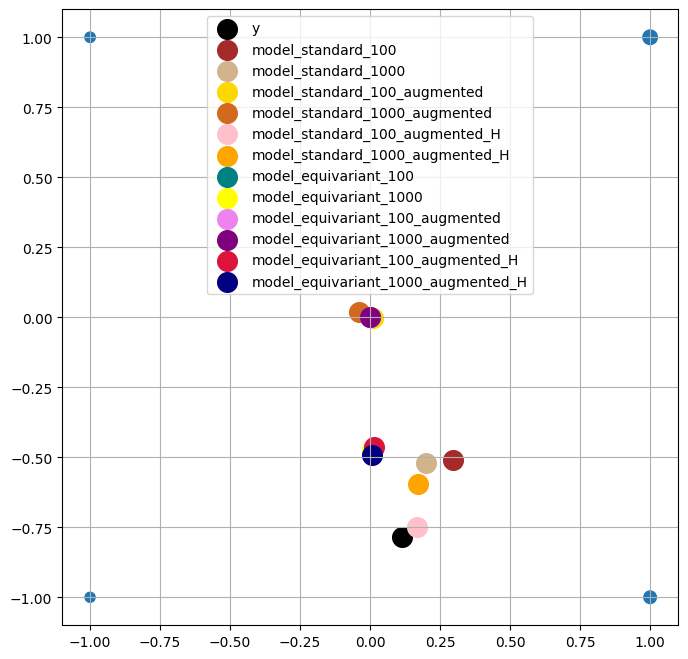

<IPython.core.display.Javascript object>

In [118]:
display_true_and_predicted_values()

In [114]:
model1 = tf.keras.models.load_model("models/model_standard_100.h5")
model2 = tf.keras.models.load_model("models/model_standard_1000.h5")
model3 = tf.keras.models.load_model("models/model_standard_100_augmented.h5")
model4 = tf.keras.models.load_model("models/model_standard_1000_augmented.h5")
model5 = tf.keras.models.load_model(
    "models/model_equivariant_100.h5", custom_objects=custom_objects
)
model6 = tf.keras.models.load_model(
    "models/model_equivariant_1000.h5", custom_objects=custom_objects
)
model7 = tf.keras.models.load_model(
    "models/model_equivariant_100_augmented.h5", custom_objects=custom_objects
)
model8 = tf.keras.models.load_model(
    "models/model_equivariant_1000_augmented.h5", custom_objects=custom_objects
)

<IPython.core.display.Javascript object>

In [115]:
y_predict1 = model1.predict(X_val_norm)
y_predict2 = model2.predict(X_val_norm)
y_predict3 = model3.predict(X_val_norm)
y_predict4 = model4.predict(X_val_norm)
y_predict5 = model5.predict(X_val_norm)
y_predict6 = model6.predict(X_val_norm)
y_predict7 = model7.predict(X_val_norm)
y_predict8 = model8.predict(X_val_norm)

32/32 [==============================] - 0s 861us/step


<IPython.core.display.Javascript object>

In [11]:
import matplotlib.pyplot as plt

def display_item(x, y, y_pred1,y_pred2,y_pred3, y_pred4,y_pred5,y_pred6,y_pred7,y_pred8):
    # Plot x points, x - intensity of borders
    plt.scatter([1.0, -1.0, -1.0, 1.0], [1.0, 1.0, -1.0, -1.0], s=x*720)
    # Plot y as coordinates
    plt.scatter(y[1], y[0], s=200, color='red', label='y')
    # Plot y_pred as coordinates
    plt.scatter(y_pred1[1], y_pred1[0], s=200, color='green', label='y_pred_1')
    plt.scatter(y_pred2[1], y_pred2[0], s=200, color='blue', label='y_pred_2')
    plt.scatter(y_pred3[1], y_pred3[0], s=200, color='yellow', label='y_pred3')
    plt.scatter(y_pred4[1], y_pred4[0], s=200, color='gray', label='y_pred4')
    plt.scatter(y_pred5[1], y_pred5[0], s=200, color='pink', label='y_pred5')
    plt.scatter(y_pred6[1], y_pred6[0], s=200, color='orange', label='y_pred6')
    plt.scatter(y_pred7[1], y_pred7[0], s=200, color='black', label='y_pred7')
    plt.scatter(y_pred8[1], y_pred8[0], s=200, color='brown', label='y_pred8')    
    plt.axis('square')
    plt.legend()
    plt.show()


<IPython.core.display.Javascript object>

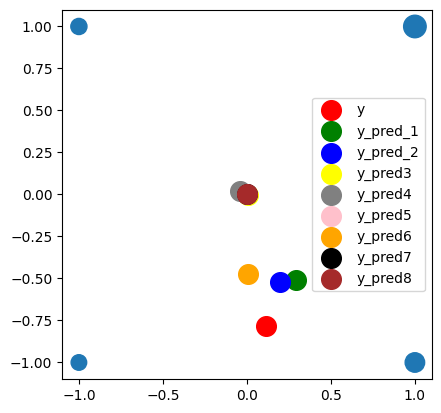

<IPython.core.display.Javascript object>

In [12]:
display_item(
    X_val_norm[0, :],
    y_val[0, :],
    y_predict1[0, :],
    y_predict2[0, :],
    y_predict3[0, :],
    y_predict4[0, :],
    y_predict5[0, :],
    y_predict6[0, :],
    y_predict7[0, :],
    y_predict8[0, :],
)

In [13]:
y_predict2[0]

array([-0.522,  0.2  ], dtype=float32)

<IPython.core.display.Javascript object>

In [14]:
y_predict1[0]

array([-0.509,  0.295], dtype=float32)

<IPython.core.display.Javascript object>

In [15]:
y_val[:, 0]

array([-0.784, -0.513, -0.434, -0.766,  0.596,  0.814, -0.596,  0.803,
        0.426, -0.059, -0.685,  0.008, -0.118,  0.466, -0.553, -0.016,
       -0.958,  0.383,  0.233,  0.116,  0.104,  0.207,  0.755,  0.965,
       -0.648, -0.305,  0.312, -0.411, -0.762,  0.44 , -0.255,  0.69 ,
       -0.055, -0.868,  0.907,  0.728, -0.844, -0.573, -0.861, -0.924,
       -0.176, -0.533,  0.062, -0.631, -0.302,  0.035,  0.015, -0.219,
        0.096, -0.873,  0.372,  0.774, -0.523, -0.193,  0.128,  0.723,
        0.774,  0.019,  0.978,  0.898, -0.007, -0.86 , -0.9  , -0.053,
       -0.808, -0.557, -0.988,  0.888, -0.664, -0.86 ,  0.005,  0.76 ,
        0.284,  0.653, -0.027, -0.455,  0.618, -0.288,  0.311,  0.568,
        0.132,  0.213, -0.975,  0.217, -0.295, -0.104,  0.107, -0.659,
        0.083, -0.259, -0.83 , -0.965,  0.092,  0.836, -0.388,  0.401,
       -0.895, -0.749,  0.946,  0.15 ,  0.226,  0.459,  0.107,  0.471,
        0.821, -0.058,  0.69 , -0.607, -0.096,  0.882, -0.268,  0.172,
      

<IPython.core.display.Javascript object>

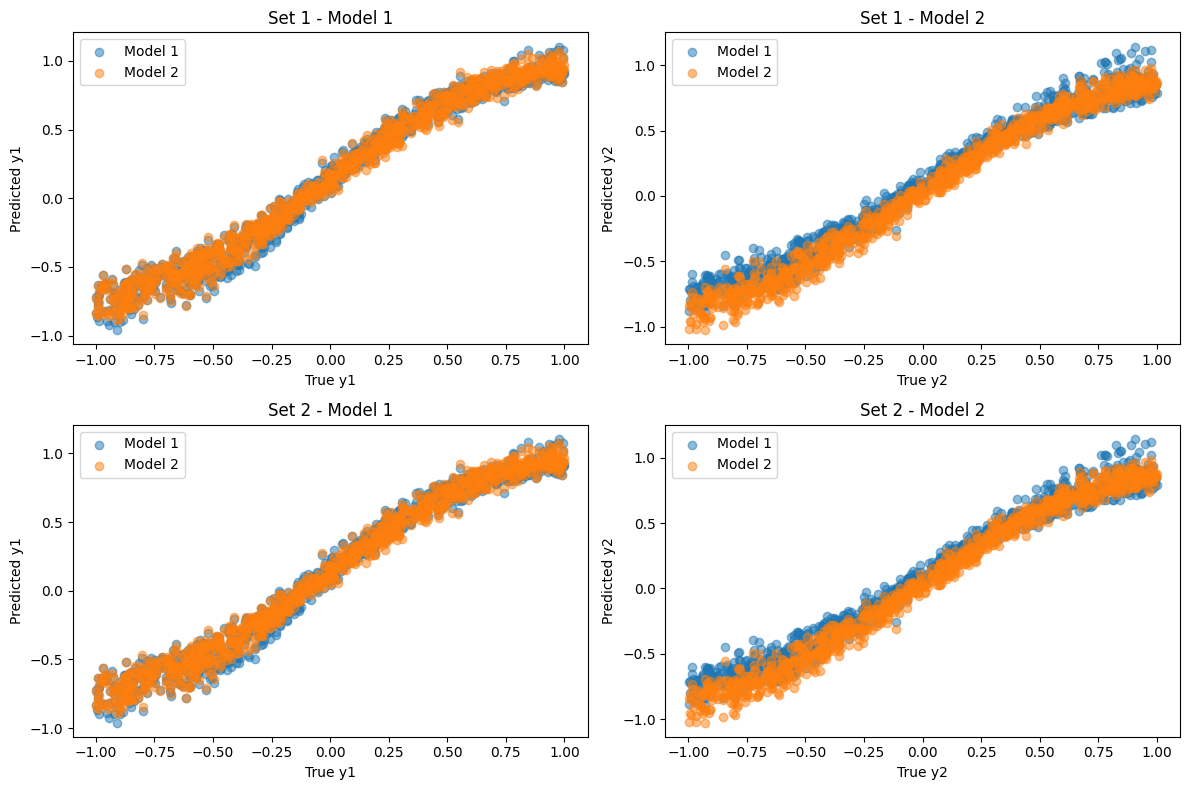

<IPython.core.display.Javascript object>

In [16]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Plot true values vs predicted values for Set 1, Model 1
ax1.scatter(y_val[:, 0], y_predict1[:, 0], label='Model 1', alpha=0.5)
ax1.scatter(y_val[:, 0], y_predict2[:, 0], label='Model 2', alpha=0.5)
ax1.set_xlabel('True y1')
ax1.set_ylabel('Predicted y1')
ax1.set_title('Set 1 - Model 1')
ax1.legend()

# Plot true values vs predicted values for Set 1, Model 2
ax2.scatter(y_val[:, 1], y_predict1[:, 1], label='Model 1', alpha=0.5)
ax2.scatter(y_val[:, 1], y_predict2[:, 1], label='Model 2', alpha=0.5)
ax2.set_xlabel('True y2')
ax2.set_ylabel('Predicted y2')
ax2.set_title('Set 1 - Model 2')
ax2.legend()

# Plot true values vs predicted values for Set 2, Model 1
ax3.scatter(y_val[:, 0], y_predict1[:, 0], label='Model 1', alpha=0.5)
ax3.scatter(y_val[:, 0], y_predict2[:, 0], label='Model 2', alpha=0.5)
ax3.set_xlabel('True y1')
ax3.set_ylabel('Predicted y1')
ax3.set_title('Set 2 - Model 1')
ax3.legend()

# Plot true values vs predicted values for Set 2, Model 2
ax4.scatter(y_val[:, 1], y_predict1[:, 1], label='Model 1', alpha=0.5)
ax4.scatter(y_val[:, 1], y_predict2[:, 1], label='Model 2', alpha=0.5)
ax4.set_xlabel('True y2')
ax4.set_ylabel('Predicted y2')
ax4.set_title('Set 2 - Model 2')
ax4.legend()

plt.tight_layout()
plt.show()


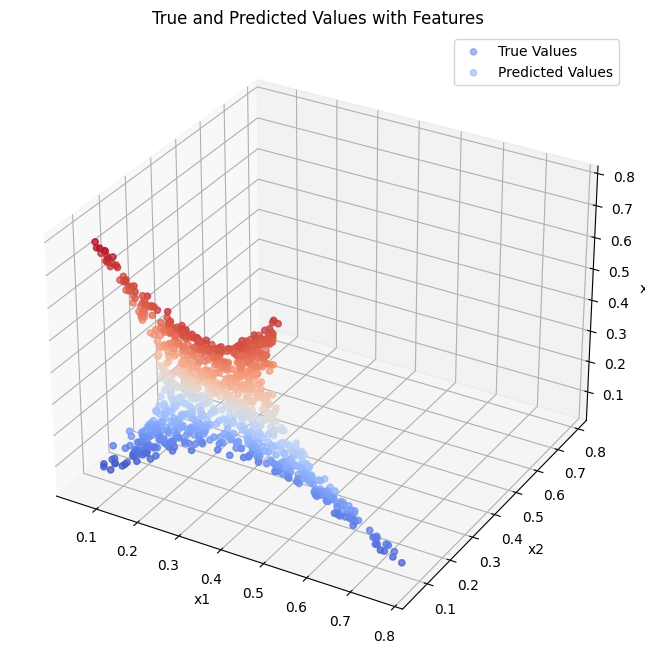

<IPython.core.display.Javascript object>

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_val_norm[:, 0], X_val_norm[:, 1], X_val_norm[:, 2], c=y_val[:, 0], cmap='coolwarm', alpha=0.5, label='True Values')
ax.scatter(X_val_norm[:, 0], X_val_norm[:, 1], X_val_norm[:, 2], c=y_predict1[:, 0], cmap='coolwarm', alpha=0.5, label='Predicted Values')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('True and Predicted Values with Features')
ax.legend()

plt.show()


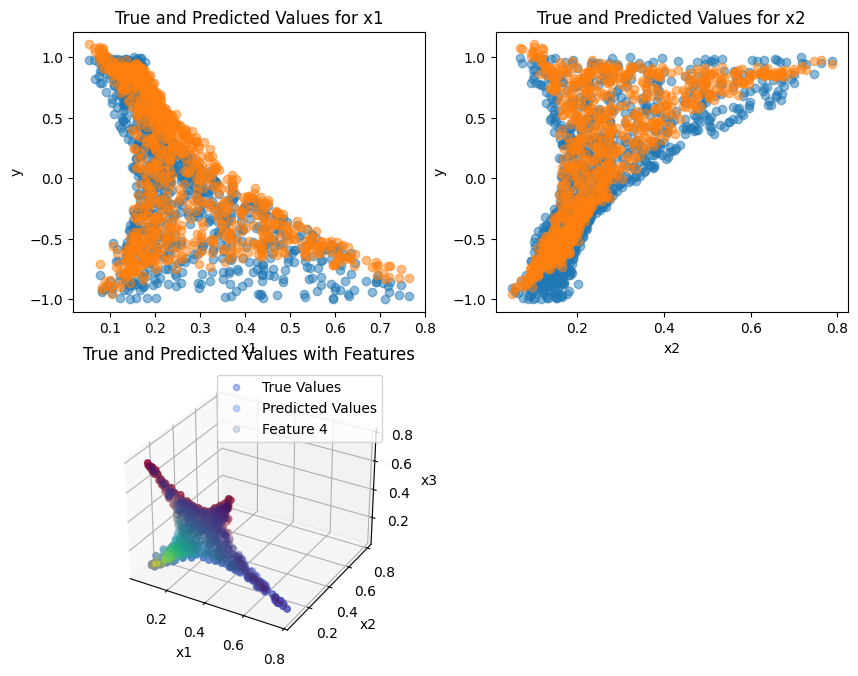

<IPython.core.display.Javascript object>

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223, projection='3d')

ax1.scatter(X_val_norm[:, 0], y_val[:, 0], alpha=0.5, label='True Values')
ax1.scatter(X_val_norm[:, 0], y_predict1[:, 0], alpha=0.5, label='Predicted Values')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')
ax1.set_title('True and Predicted Values for x1')

ax2.scatter(X_val_norm[:, 1], y_val[:, 0], alpha=0.5, label='True Values')
ax2.scatter(X_val_norm[:, 1], y_predict1[:, 0], alpha=0.5, label='Predicted Values')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')
ax2.set_title('True and Predicted Values for x2')

ax3.scatter(X_val_norm[:, 0], X_val_norm[:, 1], X_val_norm[:, 2], c=y_val[:, 0], cmap='coolwarm', alpha=0.5, label='True Values')
ax3.scatter(X_val_norm[:, 0], X_val_norm[:, 1], X_val_norm[:, 2], c=y_predict1[:, 0], cmap='coolwarm', alpha=0.5, label='Predicted Values')
ax3.scatter(X_val_norm[:, 0], X_val_norm[:, 1], X_val_norm[:, 2], c=X_val_norm[:, 3], cmap='viridis', alpha=0.2, label='Feature 4')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('x3')
ax3.set_title('True and Predicted Values with Features')
ax3.legend()

plt.show()


In [19]:
X_train_augmented[0].shape[0]

4

<IPython.core.display.Javascript object>

In [20]:
print(X_train_augmented[0])
y_val[0]

[0.425 0.177 0.153 0.245]


array([-0.784,  0.116])

<IPython.core.display.Javascript object>

In [21]:
X_val_norm[0]

array([0.365, 0.187, 0.174, 0.273])

<IPython.core.display.Javascript object>

In [22]:
Target_set

NameError: name 'Target_set' is not defined

<IPython.core.display.Javascript object>

In [ ]:
X_val_norm[0, :]

In [82]:
results = []

for i in range(1, 13):
    print("The Evaluated Results are\n")
    load_and_evaluate(i, X_val_norm, y_val)
    results.append(load_and_evaluate(i, X_val_norm, y_val))
    print("\n\n")

The Evaluated Results are

The model is trained for 100 Samples without augmentation using standard model definition
32/32 [==============================] - 0s 1ms/step - loss: 0.0207 - mae: 0.1219
The model is trained for 100 Samples without augmentation using standard model definition
32/32 [==============================] - 0s 1ms/step - loss: 0.0207 - mae: 0.1219



The Evaluated Results are

The model is trained for 1000 Samples without augmentation using standard model definition
32/32 [==============================] - 0s 3ms/step - loss: 0.0153 - mae: 0.1008
The model is trained for 1000 Samples without augmentation using standard model definition
32/32 [==============================] - 0s 3ms/step - loss: 0.0153 - mae: 0.1008



The Evaluated Results are

The model is trained for 100 Samples with augmentation using standard model definition
32/32 [==============================] - 0s 968us/step - loss: 0.3318 - mae: 0.5008
The model is trained for 100 Samples with augmentati

<IPython.core.display.Javascript object>

In [83]:
results

[[0.020725518465042114, 0.12186669558286667],
 [0.015333706513047218, 0.1007785052061081],
 [0.3317716717720032, 0.500834047794342],
 [0.006486709229648113, 0.06312944740056992],
 [0.33376678824424744, 0.5021235942840576],
 [0.008679683320224285, 0.07191496342420578],
 [0.3310955762863159, 0.5004149079322815],
 [0.17492984235286713, 0.3057720959186554],
 [0.3310454487800598, 0.5003764033317566],
 [0.17511039972305298, 0.3053055703639984],
 [0.3311033844947815, 0.5004209280014038],
 [0.1752672642469406, 0.30678585171699524]]

<IPython.core.display.Javascript object>

In [90]:
import pandas as pd

def list_to_table(input_list):
    df = pd.DataFrame(input_list, columns=['Val_loss', 'MAE','Model Name'])
    return df


<IPython.core.display.Javascript object>

In [ ]:
# my_list = [[0.12, 0.32], [0.15, 0.35], [0.11, 0.29]]
table = list_to_table(results)
print(table)


In [84]:
model_names = [
    "model_standard_100.h5",
    "model_standard_1000.h5",
    "model_standard_100_augmented.h5",
    "model_standard_100_augmented_H.h5",
    "model_standard_1000_augmented.h5",
    "model_standard_1000_augmented_H.h5",
    "model_equivariant_100.h5",
    "model_equivariant_1000.h5",
    "model_equivariant_100_augmented.h5",
    "model_equivariant_100_augmented_H.h5",
    "model_equivariant_1000_augmented.h5",
    "model_equivariant_1000_augmented_H.h5",
]

<IPython.core.display.Javascript object>

In [85]:
model_names

['model_standard_100.h5',
 'model_standard_1000.h5',
 'model_standard_100_augmented.h5',
 'model_standard_100_augmented_H.h5',
 'model_standard_1000_augmented.h5',
 'model_standard_1000_augmented_H.h5',
 'model_equivariant_100.h5',
 'model_equivariant_1000.h5',
 'model_equivariant_100_augmented.h5',
 'model_equivariant_100_augmented_H.h5',
 'model_equivariant_1000_augmented.h5',
 'model_equivariant_1000_augmented_H.h5']

<IPython.core.display.Javascript object>

In [ ]:
results.append(model_names)

In [ ]:
results

In [86]:
def merge_lists(list_2d, list_1d):
    merged_list = []
    for i in range(len(list_2d)):
        merged_list.append(list_2d[i] + [list_1d[i]])
    return merged_list

<IPython.core.display.Javascript object>

In [87]:
data = merge_lists(results, model_names)

<IPython.core.display.Javascript object>

In [88]:
data

[[0.020725518465042114, 0.12186669558286667, 'model_standard_100.h5'],
 [0.015333706513047218, 0.1007785052061081, 'model_standard_1000.h5'],
 [0.3317716717720032, 0.500834047794342, 'model_standard_100_augmented.h5'],
 [0.006486709229648113,
  0.06312944740056992,
  'model_standard_100_augmented_H.h5'],
 [0.33376678824424744, 0.5021235942840576, 'model_standard_1000_augmented.h5'],
 [0.008679683320224285,
  0.07191496342420578,
  'model_standard_1000_augmented_H.h5'],
 [0.3310955762863159, 0.5004149079322815, 'model_equivariant_100.h5'],
 [0.17492984235286713, 0.3057720959186554, 'model_equivariant_1000.h5'],
 [0.3310454487800598,
  0.5003764033317566,
  'model_equivariant_100_augmented.h5'],
 [0.17511039972305298,
  0.3053055703639984,
  'model_equivariant_100_augmented_H.h5'],
 [0.3311033844947815,
  0.5004209280014038,
  'model_equivariant_1000_augmented.h5'],
 [0.1752672642469406,
  0.30678585171699524,
  'model_equivariant_1000_augmented_H.h5']]

<IPython.core.display.Javascript object>

In [91]:
# my_list = [[0.12, 0.32], [0.15, 0.35], [0.11, 0.29]]
table = list_to_table(data)
print(table)

    Val_loss       MAE                             Model Name
0   0.020726  0.121867                  model_standard_100.h5
1   0.015334  0.100779                 model_standard_1000.h5
2   0.331772  0.500834        model_standard_100_augmented.h5
3   0.006487  0.063129      model_standard_100_augmented_H.h5
4   0.333767  0.502124       model_standard_1000_augmented.h5
5   0.008680  0.071915     model_standard_1000_augmented_H.h5
6   0.331096  0.500415               model_equivariant_100.h5
7   0.174930  0.305772              model_equivariant_1000.h5
8   0.331045  0.500376     model_equivariant_100_augmented.h5
9   0.175110  0.305306   model_equivariant_100_augmented_H.h5
10  0.331103  0.500421    model_equivariant_1000_augmented.h5
11  0.175267  0.306786  model_equivariant_1000_augmented_H.h5


<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

def list_to_table(input_list):
    df = pd.DataFrame(input_list, columns=['Val_loss', 'MAE','Model Name'])
    return df


In [ ]:
import pandas as pd

# Define the data for the table
data = {'Name': ['John', 'Mary', 'Sara', 'Tom'],
        'Age': [25, 30, 28, 35],
        'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Use pandas to output the table as HTML
table_html = df.to_html(index=False)

# Print the HTML code
print(table_html)


In [92]:
from PIL import Image, ImageDraw, ImageFont
import textwrap

# Convert the table to a string
table = list_to_table(data)
table_str = "\n".join(table)

# Define font properties
font_size = 16
font_path = "path/to/font.ttf"
font = ImageFont.truetype(font_path, font_size)

# Define image dimensions
img_width = 800
img_height = 600

# Create an image object
img = Image.new("RGB", (img_width, img_height), color=(255, 255, 255))
draw = ImageDraw.Draw(img)

# Wrap the table text to fit within the image width
wrapped_text = textwrap.wrap(table_str, width=img_width // font_size)

# Draw the wrapped text onto the image
y_text = 0
for line in wrapped_text:
    line_width, line_height = font.getsize(line)
    draw.text((0, y_text), line, font=font, fill=(0, 0, 0))
    y_text += line_height

# Save the image
img.save("table.png")


OSError: cannot open resource

<IPython.core.display.Javascript object>

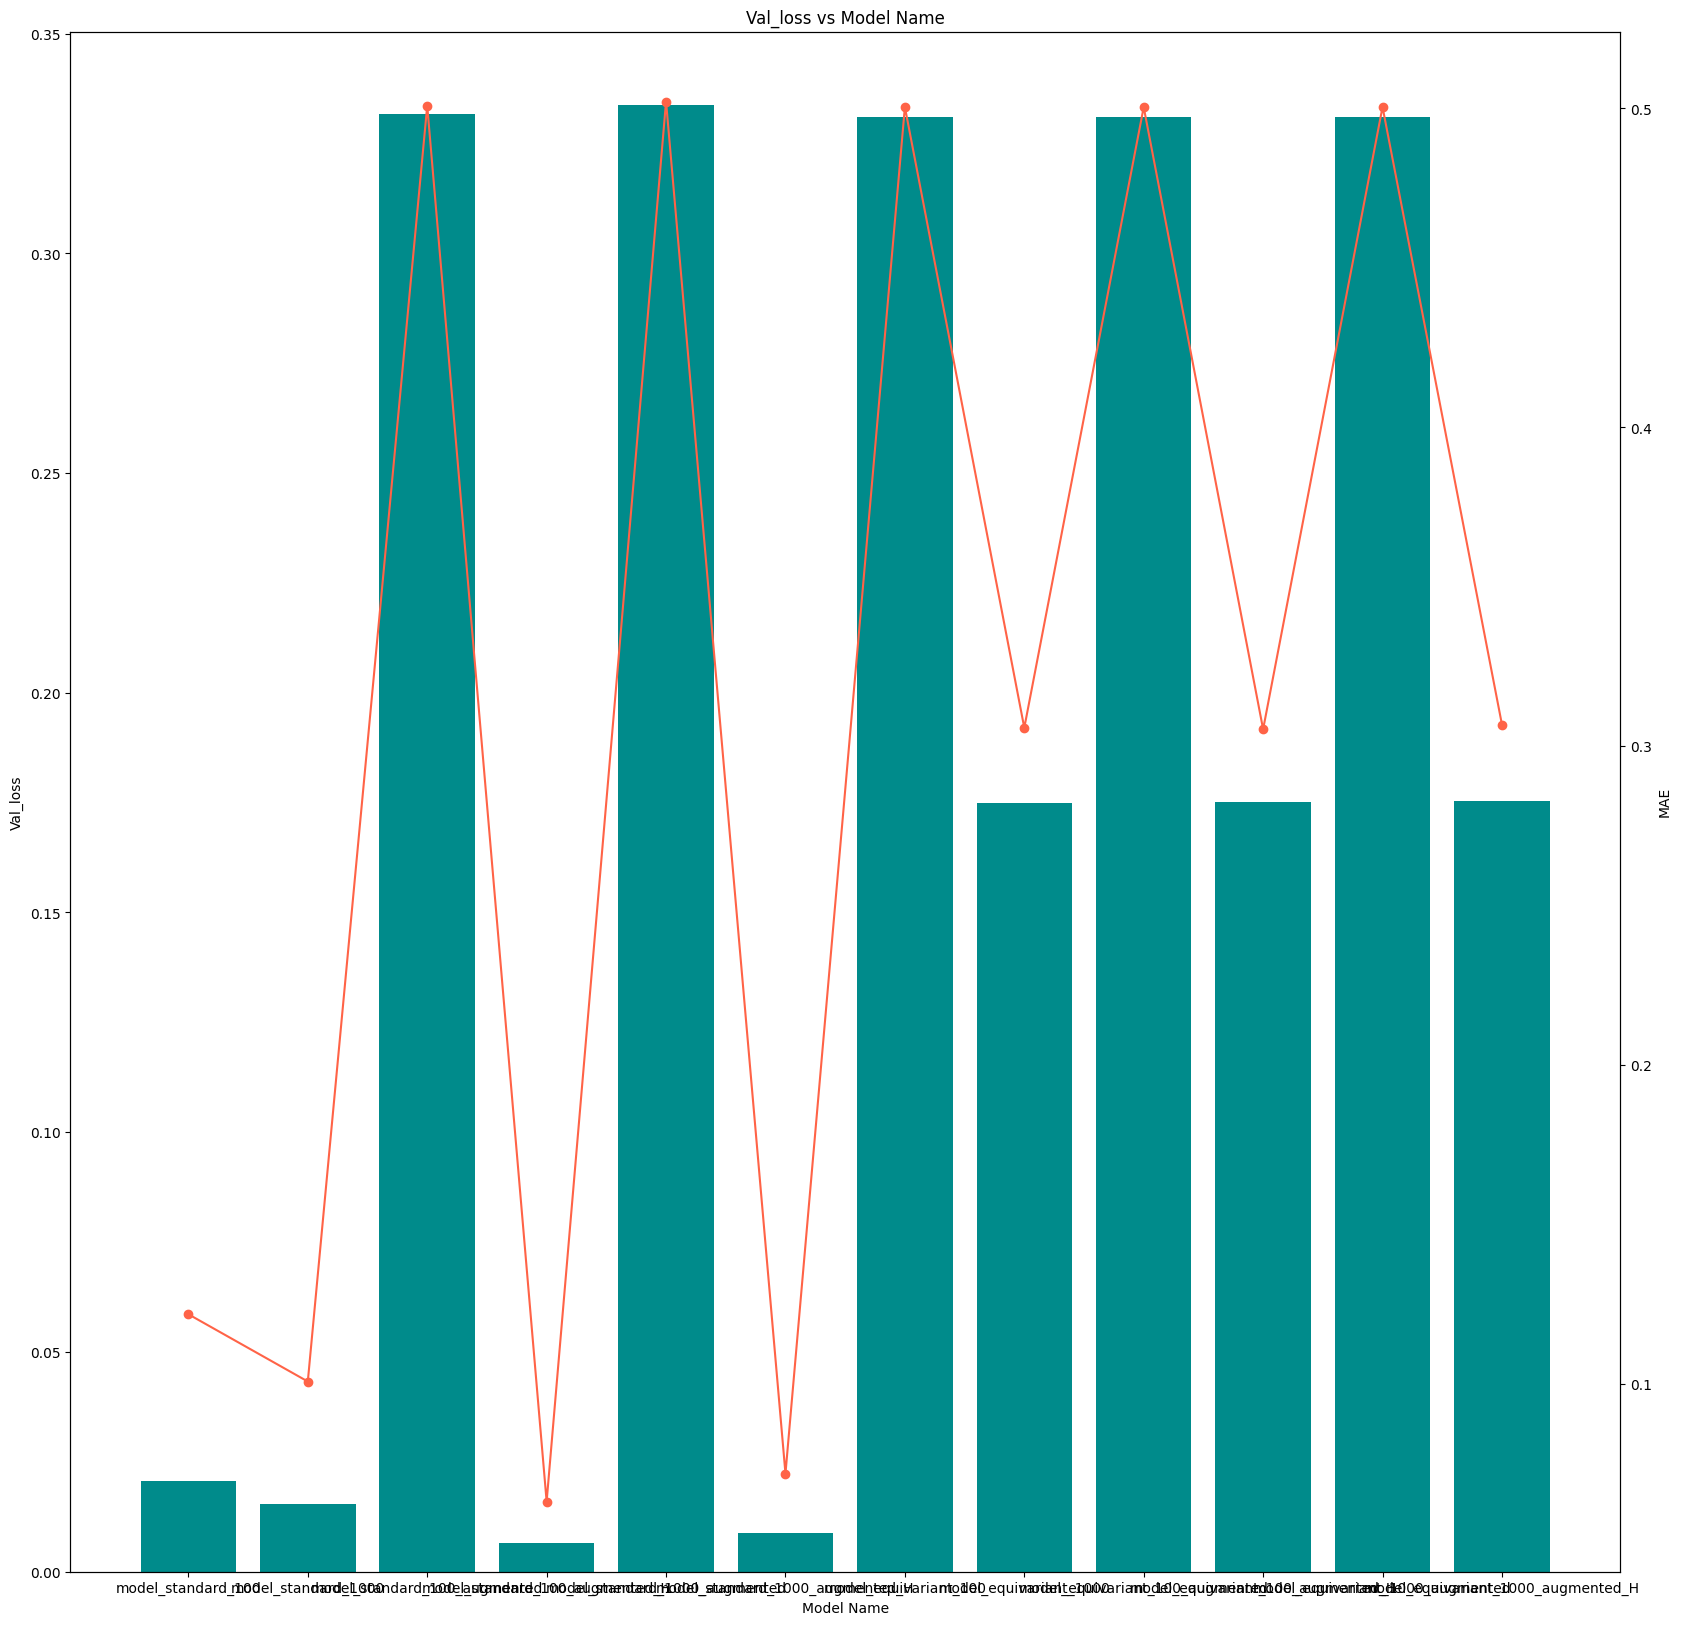

<IPython.core.display.Javascript object>

In [95]:
import matplotlib.pyplot as plt

# create the data
Val_loss = [0.020726, 0.015334, 0.331772, 0.006487, 0.333767, 0.008680, 0.331096, 0.174930, 0.331045, 0.175110, 0.331103, 0.175267]
MAE = [0.121867, 0.100779, 0.500834, 0.063129, 0.502124, 0.071915, 0.500415, 0.305772, 0.500376, 0.305306, 0.500421, 0.306786]
Model_Name = ['model_standard_100', 'model_standard_1000', 'model_standard_100_augmented', 'model_standard_100_augmented_H', 'model_standard_1000_augmented', 'model_standard_1000_augmented_H', 'model_equivariant_100', 'model_equivariant_1000', 'model_equivariant_100_augmented', 'model_equivariant_100_augmented_H', 'model_equivariant_1000_augmented', 'model_equivariant_1000_augmented_H']

# create the figure and axis objects
fig, ax = plt.subplots(figsize=(20, 20))

# create the bar chart for Val_loss
ax.bar(Model_Name, Val_loss, color='darkcyan')
ax.set_xlabel('Model Name')
ax.set_ylabel('Val_loss')
ax.set_title('Val_loss vs Model Name')

# create a twin y-axis for MAE
ax2 = ax.twinx()
ax2.plot(Model_Name, MAE, color='tomato', marker='o')
ax2.set_ylabel('MAE')

# display the plot
plt.show()


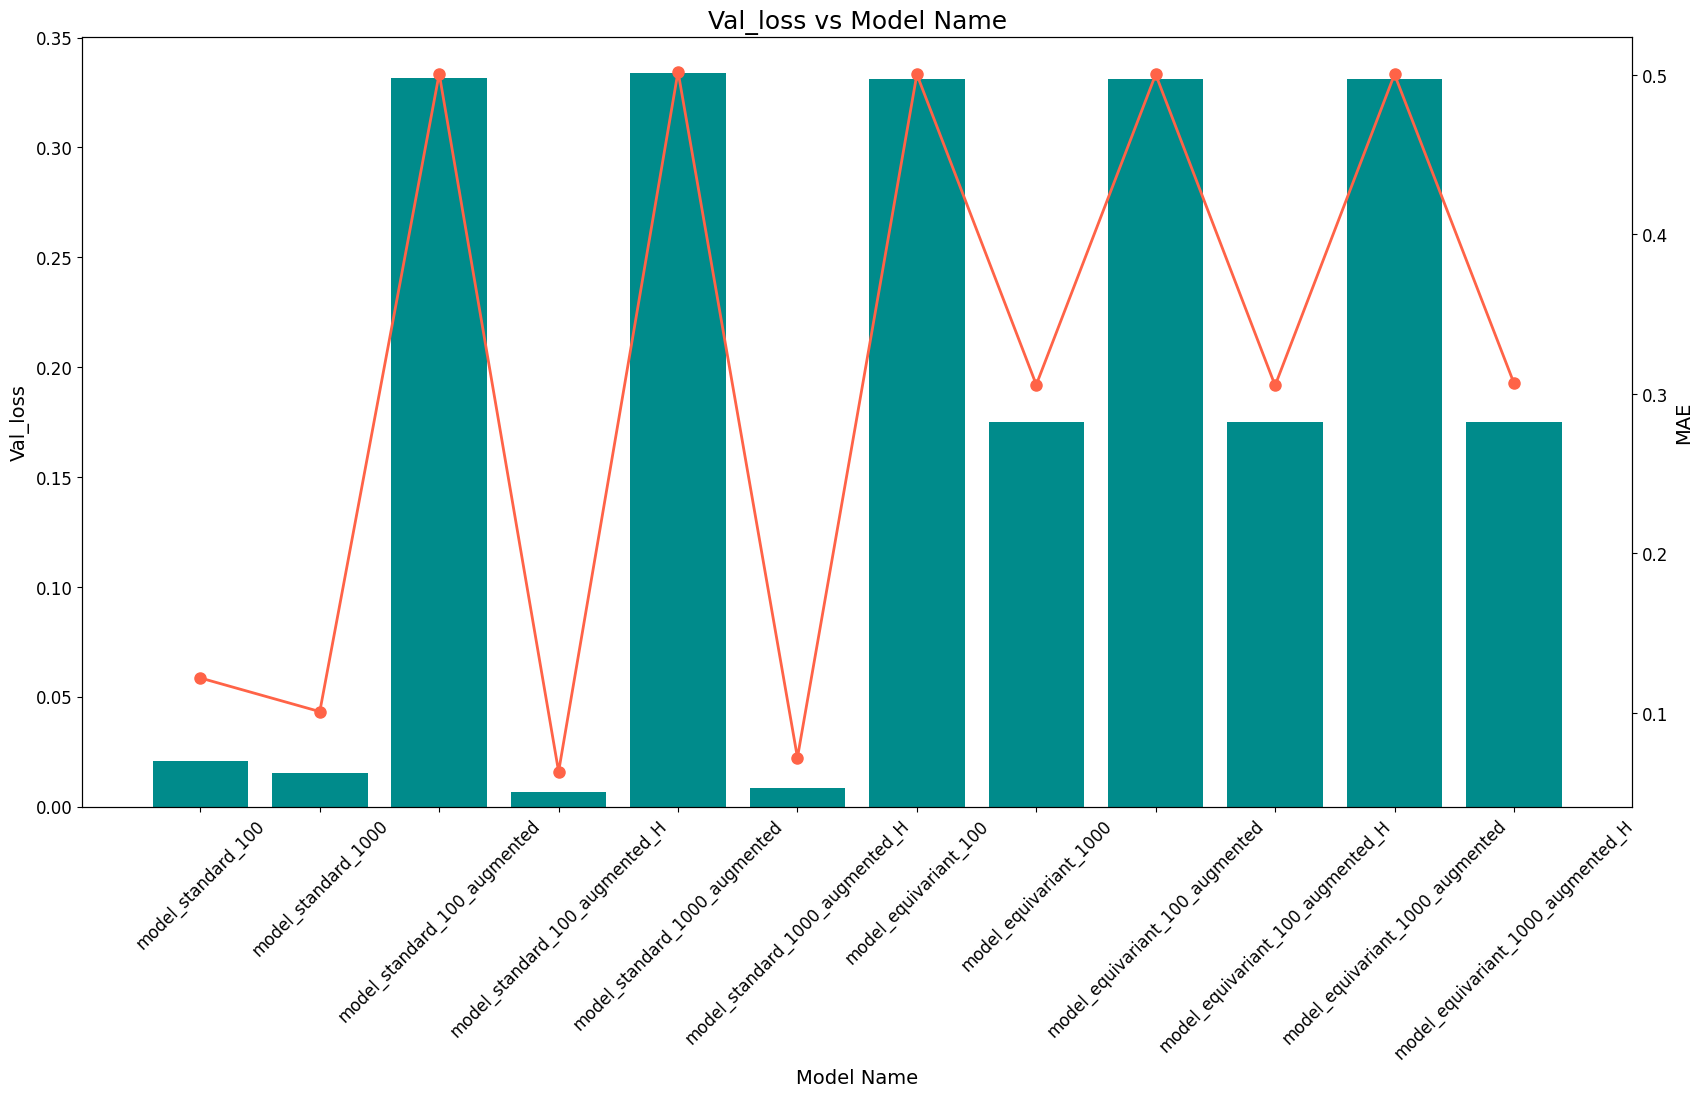

<IPython.core.display.Javascript object>

In [96]:
import matplotlib.pyplot as plt

# create the data
Val_loss = [0.020726, 0.015334, 0.331772, 0.006487, 0.333767, 0.008680, 0.331096, 0.174930, 0.331045, 0.175110, 0.331103, 0.175267]
MAE = [0.121867, 0.100779, 0.500834, 0.063129, 0.502124, 0.071915, 0.500415, 0.305772, 0.500376, 0.305306, 0.500421, 0.306786]
Model_Name = ['model_standard_100', 'model_standard_1000', 'model_standard_100_augmented', 'model_standard_100_augmented_H', 'model_standard_1000_augmented', 'model_standard_1000_augmented_H', 'model_equivariant_100', 'model_equivariant_1000', 'model_equivariant_100_augmented', 'model_equivariant_100_augmented_H', 'model_equivariant_1000_augmented', 'model_equivariant_1000_augmented_H']

# create the figure and axis objects
fig, ax = plt.subplots(figsize=(20, 10))

# create the bar chart for Val_loss
ax.bar(Model_Name, Val_loss, color='darkcyan')
ax.set_xlabel('Model Name', fontsize=14)
ax.set_ylabel('Val_loss', fontsize=14)
ax.set_title('Val_loss vs Model Name', fontsize=18)

# create a twin y-axis for MAE
ax2 = ax.twinx()
ax2.plot(Model_Name, MAE, color='tomato', marker='o', linewidth=2, markersize=8)
ax2.set_ylabel('MAE', fontsize=14)

# set axis tick labels to be more visible
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

# display the plot
plt.show()


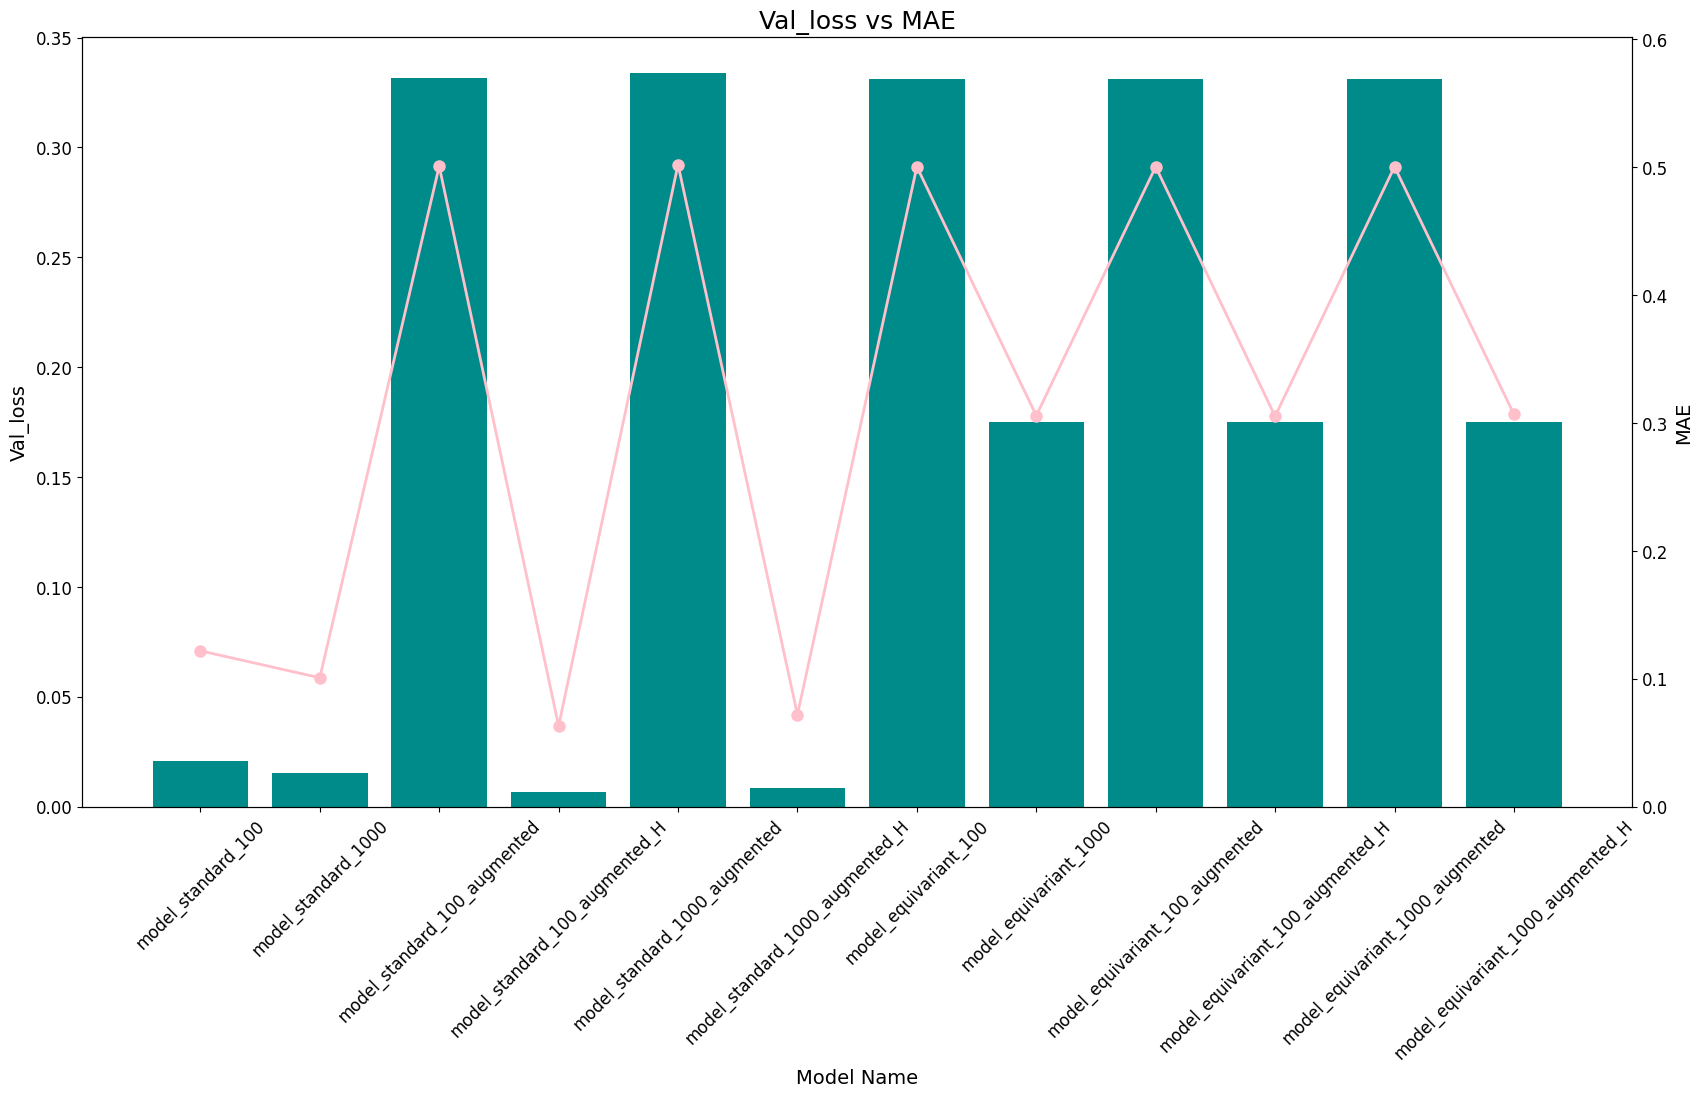

<IPython.core.display.Javascript object>

In [98]:
import matplotlib.pyplot as plt

# create the data
Val_loss = [0.020726, 0.015334, 0.331772, 0.006487, 0.333767, 0.008680, 0.331096, 0.174930, 0.331045, 0.175110, 0.331103, 0.175267]
MAE = [0.121867, 0.100779, 0.500834, 0.063129, 0.502124, 0.071915, 0.500415, 0.305772, 0.500376, 0.305306, 0.500421, 0.306786]
Model_Name = ['model_standard_100', 'model_standard_1000', 'model_standard_100_augmented', 'model_standard_100_augmented_H', 'model_standard_1000_augmented', 'model_standard_1000_augmented_H', 'model_equivariant_100', 'model_equivariant_1000', 'model_equivariant_100_augmented', 'model_equivariant_100_augmented_H', 'model_equivariant_1000_augmented', 'model_equivariant_1000_augmented_H']

# create the figure and axis objects
fig, ax = plt.subplots(figsize=(20, 10))

# create the bar chart for Val_loss
ax.bar(Model_Name, Val_loss, color='darkcyan')
ax.set_xlabel('Model Name', fontsize=14)
ax.set_ylabel('Val_loss', fontsize=14)
ax.set_title('Val_loss vs MAE', fontsize=18)

# create a twin y-axis for MAE
ax2 = ax.twinx()
ax2.plot(Model_Name, MAE, color='pink', marker='o', linewidth=2, markersize=8)
ax2.set_ylabel('MAE', fontsize=14)

# set axis tick labels to be more visible
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

# adjust the y-axis limits for the MAE curve
ax2.set_ylim([0, max(MAE)+0.1])

# display the plot
plt.savefig("Val_loss_")
plt.show()


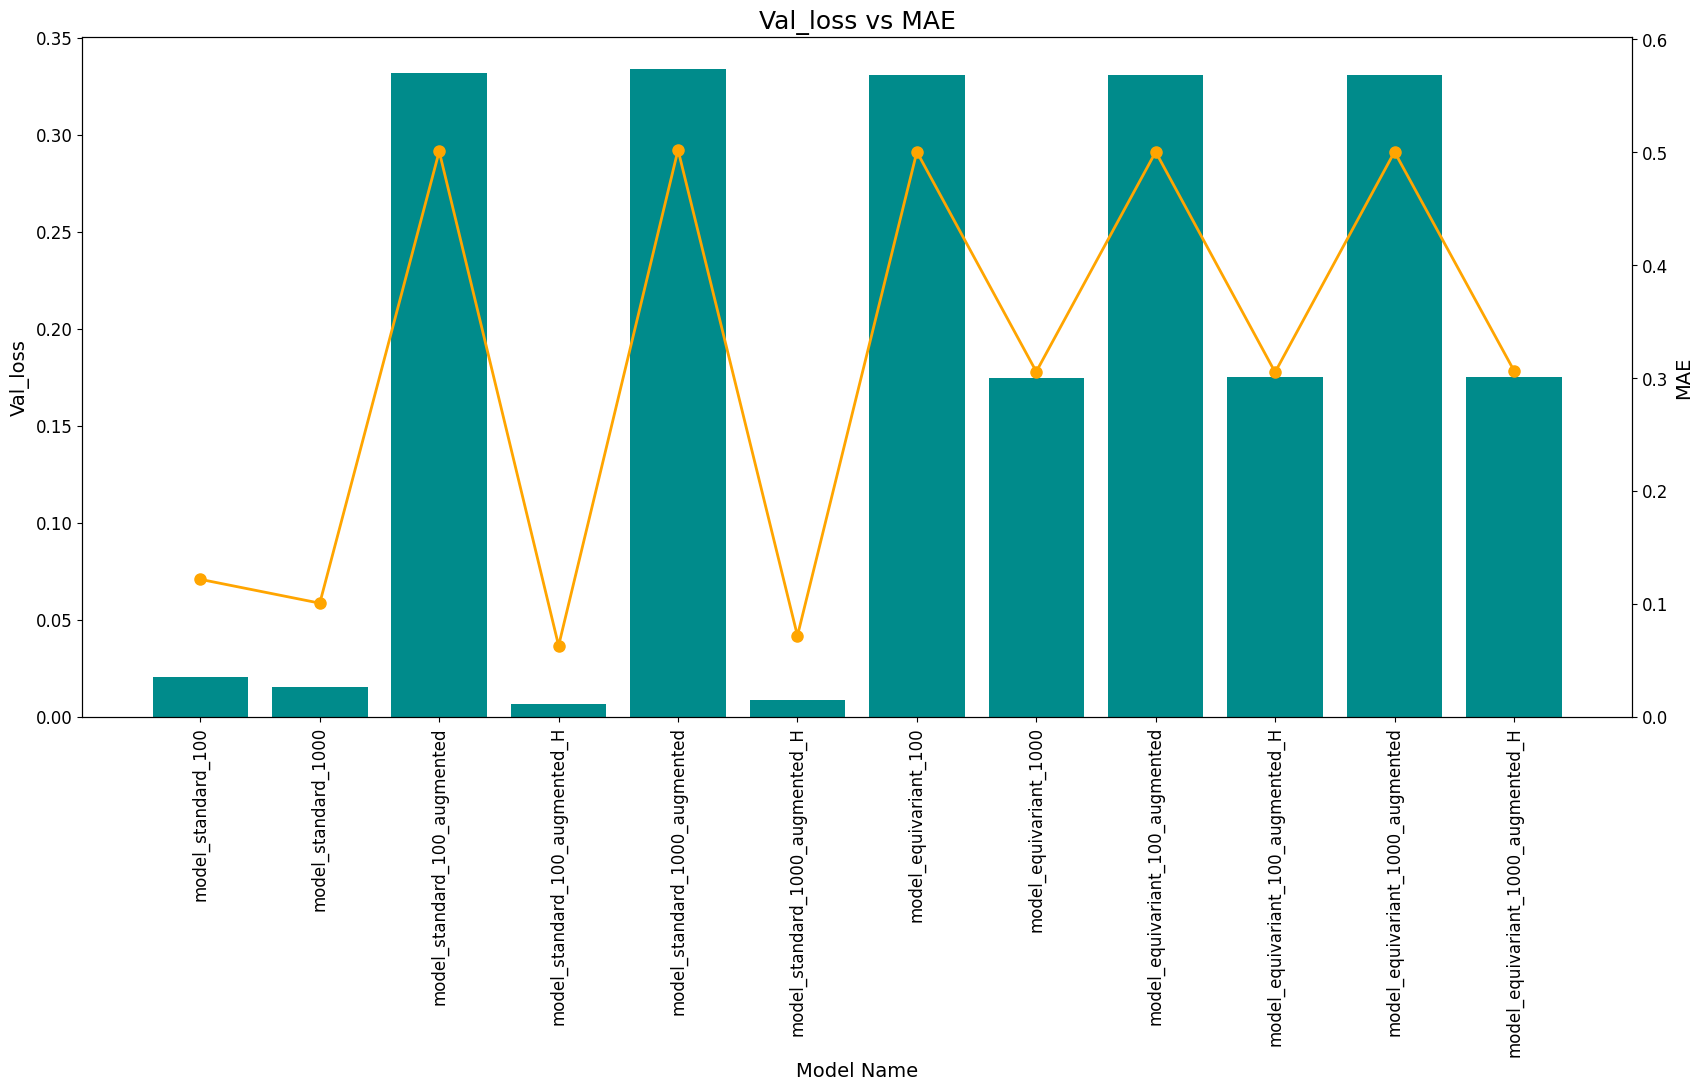

<IPython.core.display.Javascript object>

In [119]:
import matplotlib.pyplot as plt

# create the data
Val_loss = [0.020726, 0.015334, 0.331772, 0.006487, 0.333767, 0.008680, 0.331096, 0.174930, 0.331045, 0.175110, 0.331103, 0.175267]
MAE = [0.121867, 0.100779, 0.500834, 0.063129, 0.502124, 0.071915, 0.500415, 0.305772, 0.500376, 0.305306, 0.500421, 0.306786]
Model_Name = ['model_standard_100', 'model_standard_1000', 'model_standard_100_augmented', 'model_standard_100_augmented_H', 'model_standard_1000_augmented', 'model_standard_1000_augmented_H', 'model_equivariant_100', 'model_equivariant_1000', 'model_equivariant_100_augmented', 'model_equivariant_100_augmented_H', 'model_equivariant_1000_augmented', 'model_equivariant_1000_augmented_H']

# create the figure and axis objects
fig, ax = plt.subplots(figsize=(20, 10))

# create the bar chart for Val_loss
ax.bar(Model_Name, Val_loss, color='darkcyan')
ax.set_xlabel('Model Name', fontsize=14)
ax.set_ylabel('Val_loss', fontsize=14)
ax.set_title('Val_loss vs MAE', fontsize=18)

# create a twin y-axis for MAE
ax2 = ax.twinx()
ax2.plot(Model_Name, MAE, color='orange', marker='o', linewidth=2, markersize=8)
ax2.set_ylabel('MAE', fontsize=14)

# set axis tick labels to be more visible
ax.tick_params(axis='x', labelrotation=90, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

# adjust the y-axis limits for the MAE curve
ax2.set_ylim([0, max(MAE)+0.1])

# adjust subplot parameters to avoid cropping
plt.subplots_adjust(bottom=0.2)

# save the plot
plt.savefig("Val_loss.png", bbox_inches='tight')

# display the plot
plt.show()
